# Тестирование Сглаживание времянных рядов за счет сверки нормальным распределением

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import signal as sgl

In [16]:
df = pd.read_csv("usd 13.csv", delimiter=";", decimal=",", encoding="cp1251")
df['data'] = pd.to_datetime(df['data'], format='%d.%m.%Y')
df = df.sort_values(by='data')

df.head()

,nominal,data,curs,cdx
5712,1,2000-09-01,27.75,Доллар США
5711,1,2000-09-02,27.75,Доллар США
5710,1,2000-09-05,27.75,Доллар США
5709,1,2000-09-06,27.84,Доллар США
5708,1,2000-09-07,27.88,Доллар США


In [282]:
data = df.curs.to_numpy()
# data = (data - data.mean())/data.std()

data

array([27.75  , 27.75  , 27.75  , ..., 94.7035, 95.9794, 96.1609])

In [327]:
# Создание графика нормального распределения
mean = 0  # Среднее значение
std = 0.1 # Стандартное отклонение
n= 100 
x = np.linspace(-1, 1, n)  # Определение оси x для графика
pdf = norm.pdf(x, mean, std) # Функция плотности вероятности


# Быстрое преобразование Фурье (БПФ)
signal = np.pad(data, (200,200))
signal_fft = np.fft.fft(signal)
pdf_fft = np.fft.fft(pdf, signal.size)

# Умножение БПФ сигнала на БПФ графика нормального распределения
convolution_fft = signal_fft * pdf_fft

# Обратное БПФ
convolution = np.fft.ifft(convolution_fft)

# Получение реальной части результата обратного БПФ
convolution = convolution.real

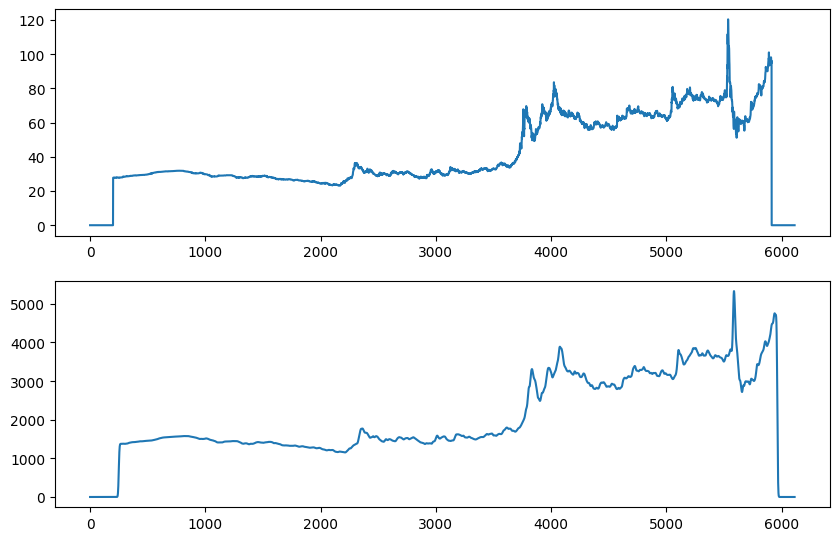

In [328]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(signal)
plt.subplot(3,1,2)
plt.plot(convolution)

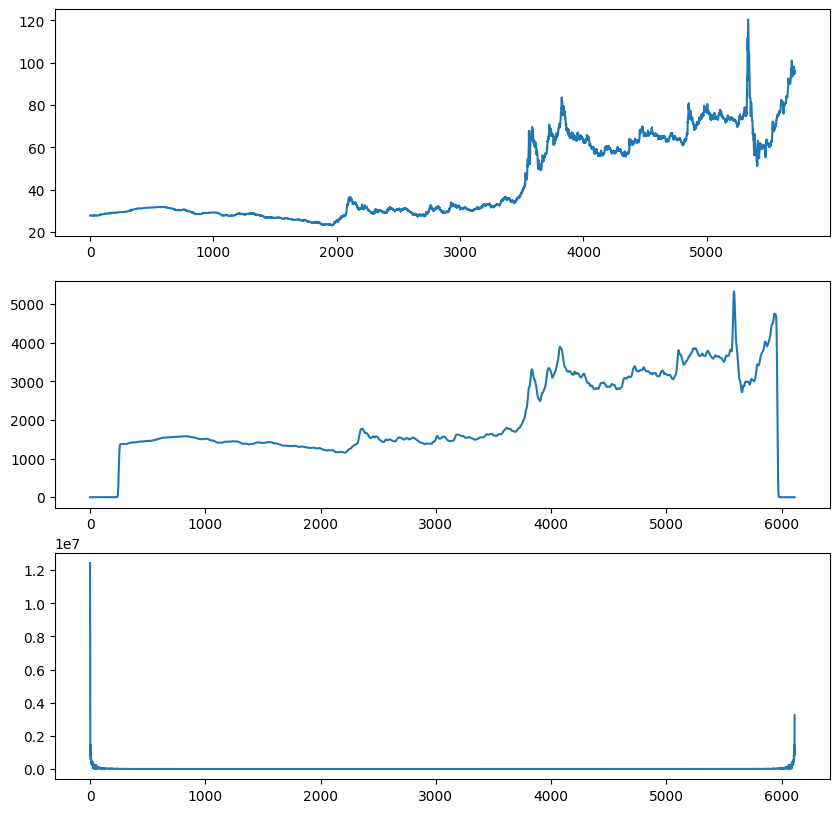

In [329]:
signal = convolution

# Выполняем преобразование Фурье
fourier =np.fft.fft(signal)
    
# Вычисляем модуль каждой частоты
magnitude_spectrum = np.abs(fourier)

# Построение графика модуля каждой частоты
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.plot(data)
plt.subplot(3, 1, 2)
plt.plot(signal)
plt.subplot(3, 1, 3)
plt.plot(magnitude_spectrum)
plt.show()

# Создание шума за счет обратной свертки

### Если свертка нормальным распределением убирает шум, что будет если к гладкой функции применить обратую свертку нормальным распределением

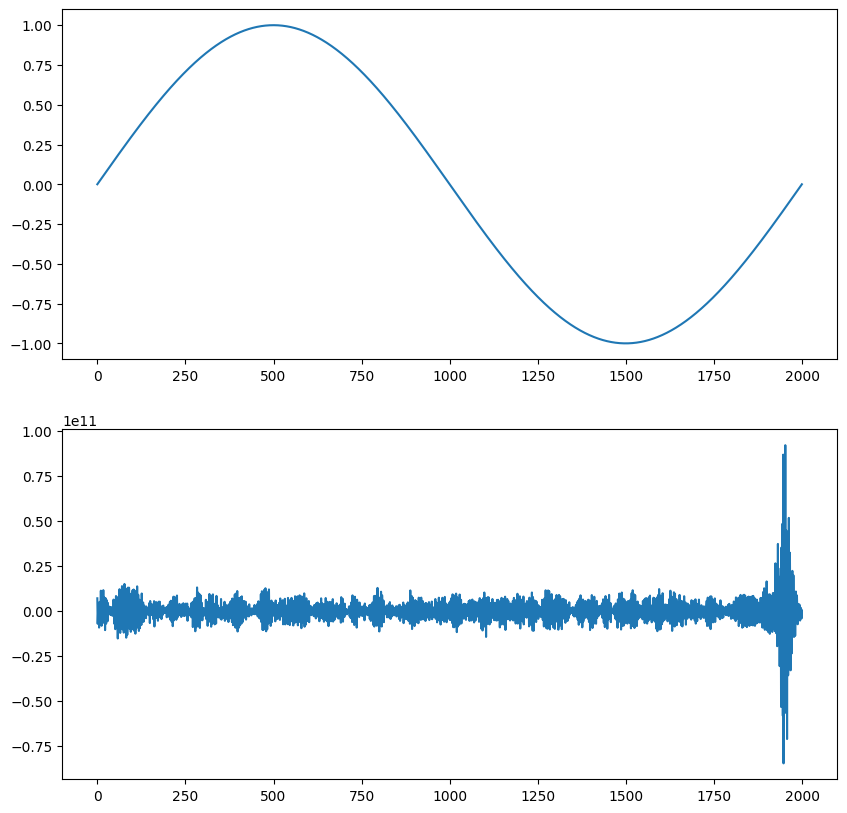

In [330]:
x = np.linspace(0,1,2000)
sin = np.sin(2*np.pi*x)

noize_sin = np.fft.ifft(np.fft.fft(sin)/np.fft.fft(pdf,sin.size)).real

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(sin)
plt.subplot(2, 1, 2)
plt.plot(noize_sin)

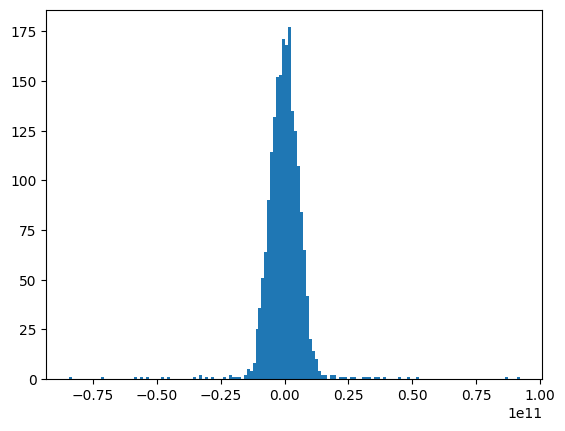

In [318]:
plt.hist(noize_sin, bins='auto')
plt.show()

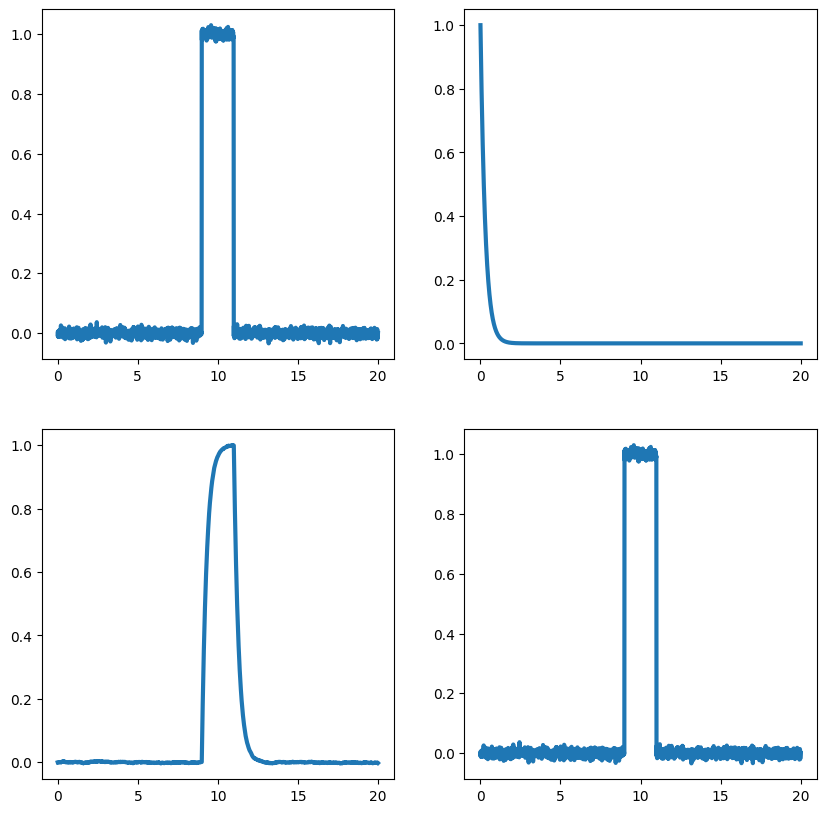

In [219]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

x = np.arange(0., 20.01, 0.01)
y = np.zeros(len(x))
y[900:1100] = 1.
y += 0.01 * np.random.randn(len(y))
c = np.exp(-(np.arange(len(y))) / 30.)

yc = scipy.signal.convolve(y, c, mode='full') / c.sum()
ydc, remainder = scipy.signal.deconvolve(yc, c)
ydc *= c.sum()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].plot(x, y, label="original y", lw=3)
ax[0][1].plot(x, c, label="c", lw=3)
ax[1][0].plot(x[0:2000], yc[0:2000], label="yc", lw=3)
ax[1][1].plot(x, ydc, label="recovered y", lw=3)

plt.show()  